In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('disney.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # CONVIERTE EL FORMATO DEFAULT DE BGR A RGB

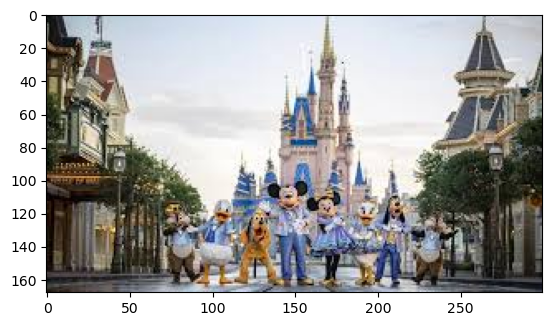

In [3]:
plt.imshow(img)
plt.show()

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def activate_color_channels(image, color):
    # Dividir la imagen en sus tres canales: B, G y R
    b, g, r = cv2.split(image)

    # Crear una imagen vacía con las mismas dimensiones para los canales
    empty_channel = np.zeros_like(b)

    # Activar los canales de color según el parámetro 'color'
    if color == 1:
        # Solo canal rojo
        output_image = cv2.merge([empty_channel, empty_channel, r])
    elif color == 2:
        # Solo canal verde
        output_image = cv2.merge([empty_channel, g, empty_channel])
    elif color == 3:
        # Solo canal azul
        output_image = cv2.merge([b, empty_channel, empty_channel])
    elif color == 10:
        # Solo rojo y verde activos, sin azul
        output_image = cv2.merge([empty_channel, g, r])
    elif color == 20:
        # Solo verde y azul activos, sin rojo
        output_image = cv2.merge([b, g, empty_channel])
    elif color == 30:
        # Solo azul y rojo activos, sin verde
        output_image = cv2.merge([b, empty_channel, r])
    else:
        # Valor no válido, devolver la imagen original
        output_image = image

    return output_image

# Cargar la imagen
img = cv2.imread('disney.jpg')

# Verificar si la imagen se cargó correctamente
if img is None:
    raise FileNotFoundError("La imagen no se pudo cargar. Verifica la ruta y el archivo.")

# Convertir la imagen de BGR a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)






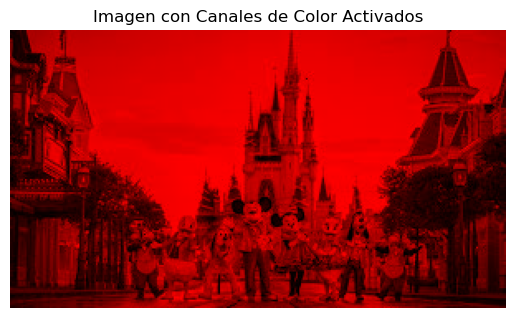

In [5]:
# Definir el valor de 'color' para activar los canales
color = 3  # Cambia este valor para probar otros casos
# Llamar a la función para obtener la imagen con los canales de color activados
result_image = activate_color_channels(img_rgb, color)

# Mostrar la imagen resultante utilizando matplotlib
plt.imshow(result_image)
plt.title('Imagen con Canales de Color Activados')
plt.axis('off')  # Ocultar los ejes
plt.show()


### Problema 2

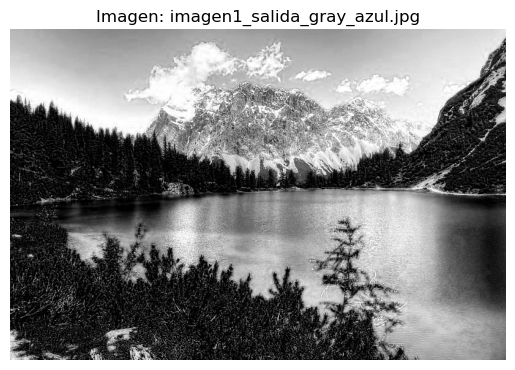

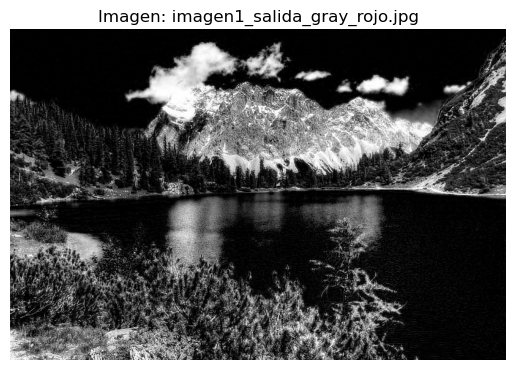

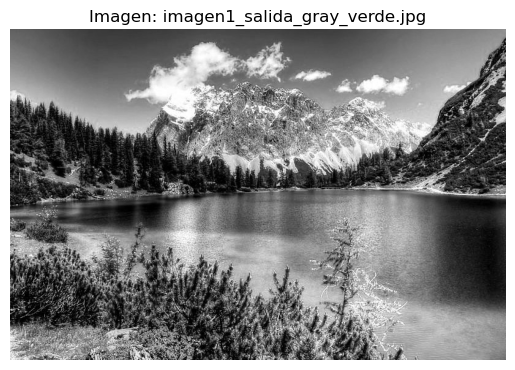

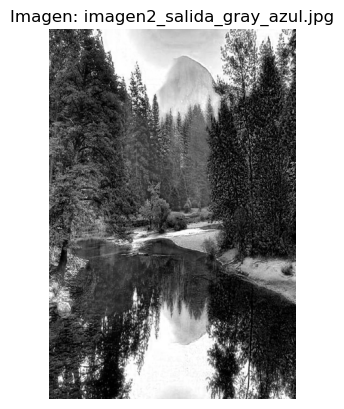

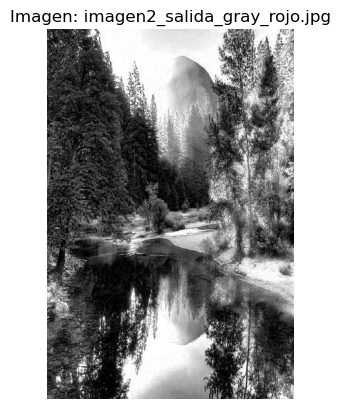

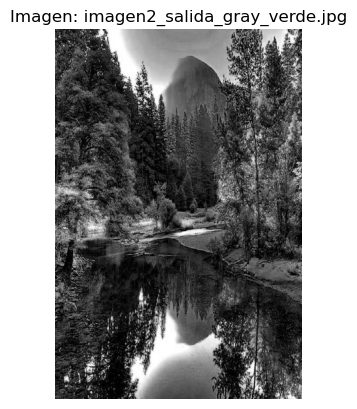

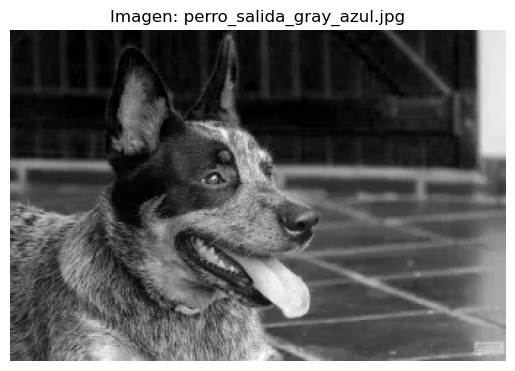

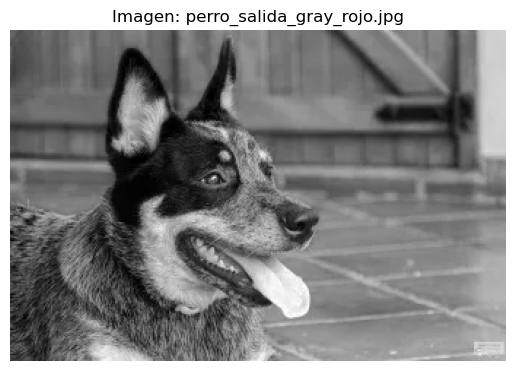

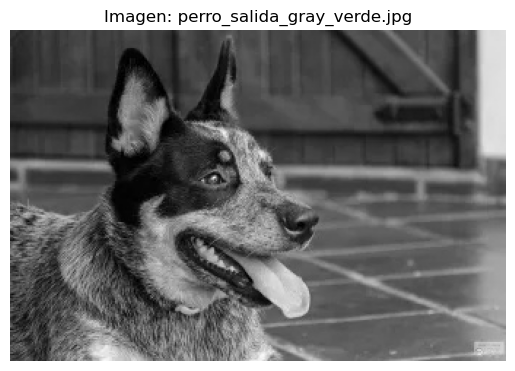

In [6]:

# Lista de rutas de imágenes
image_paths = ['imagen1_salida_gray_azul.jpg', 'imagen1_salida_gray_rojo.jpg', 'imagen1_salida_gray_verde.jpg', 'imagen2_salida_gray_azul.jpg', 'imagen2_salida_gray_rojo.jpg', 'imagen2_salida_gray_verde.jpg', 'perro_salida_gray_azul.jpg', 'perro_salida_gray_rojo.jpg', 'perro_salida_gray_verde.jpg']

# Iterar sobre la lista de rutas de imágenes
for path in image_paths:
    # Cargar la imagen
    img = cv2.imread(path)
    
    # Verificar si la imagen se cargó correctamente
    if img is None:
        print(f"Error al cargar la imagen {path}. Verifica la ruta y el archivo.")
        continue
    
    # Convertir la imagen de BGR a RGB para visualización
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Mostrar la imagen utilizando matplotlib
    plt.figure()
    plt.imshow(img_rgb)
    plt.title(f'Imagen: {path}')
    plt.axis('off')  # Ocultar los ejes
    plt.show()


### Problema 3

In [7]:
img_3 = cv2.imread('universal.jpg')
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB) # CONVIERTE EL FORMATO DEFAULT DE BGR A RGB

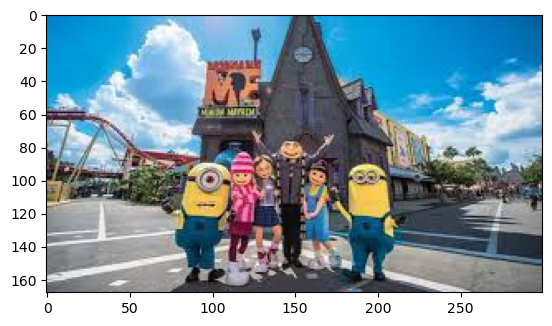

In [8]:
plt.imshow(img_3)
plt.show()

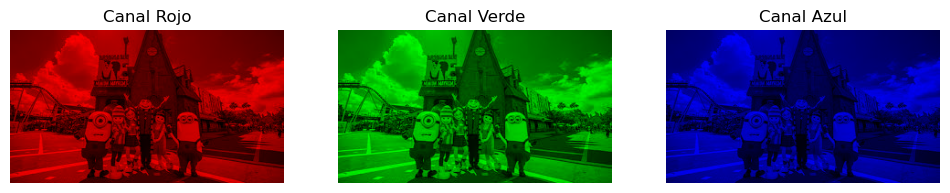

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_grayscale_3d(img):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Crear tres imágenes en color usando la escala de grises
    red_channel = cv2.merge([gray, np.zeros_like(gray), np.zeros_like(gray)])  # Solo rojo
    green_channel = cv2.merge([np.zeros_like(gray), gray, np.zeros_like(gray)])  # Solo verde
    blue_channel = cv2.merge([np.zeros_like(gray), np.zeros_like(gray), gray])  # Solo azul

    return red_channel, green_channel, blue_channel

# Cargar la imagen
img_3 = cv2.imread('universal.jpg')
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)  # Convertir a RGB

# Crear imágenes en escala de grises en 3D
red_img, green_img, blue_img = create_grayscale_3d(img_3)

# Mostrar las imágenes resultantes
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(red_img)
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_img)
plt.title('Canal Verde')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_img)
plt.title('Canal Azul')
plt.axis('off')

plt.show()


### Problema 4

In [10]:
img_4 = cv2.imread('granja.jpg')
img_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB) # CONVIERTE EL FORMATO DEFAULT DE BGR A RGB

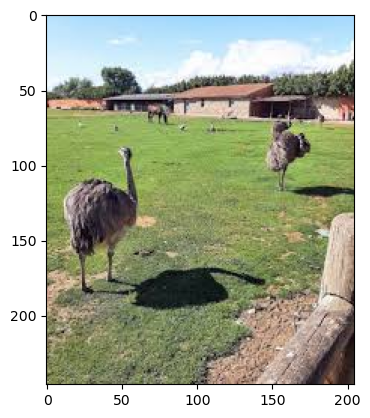

In [11]:
plt.imshow(img_4)
plt.show()

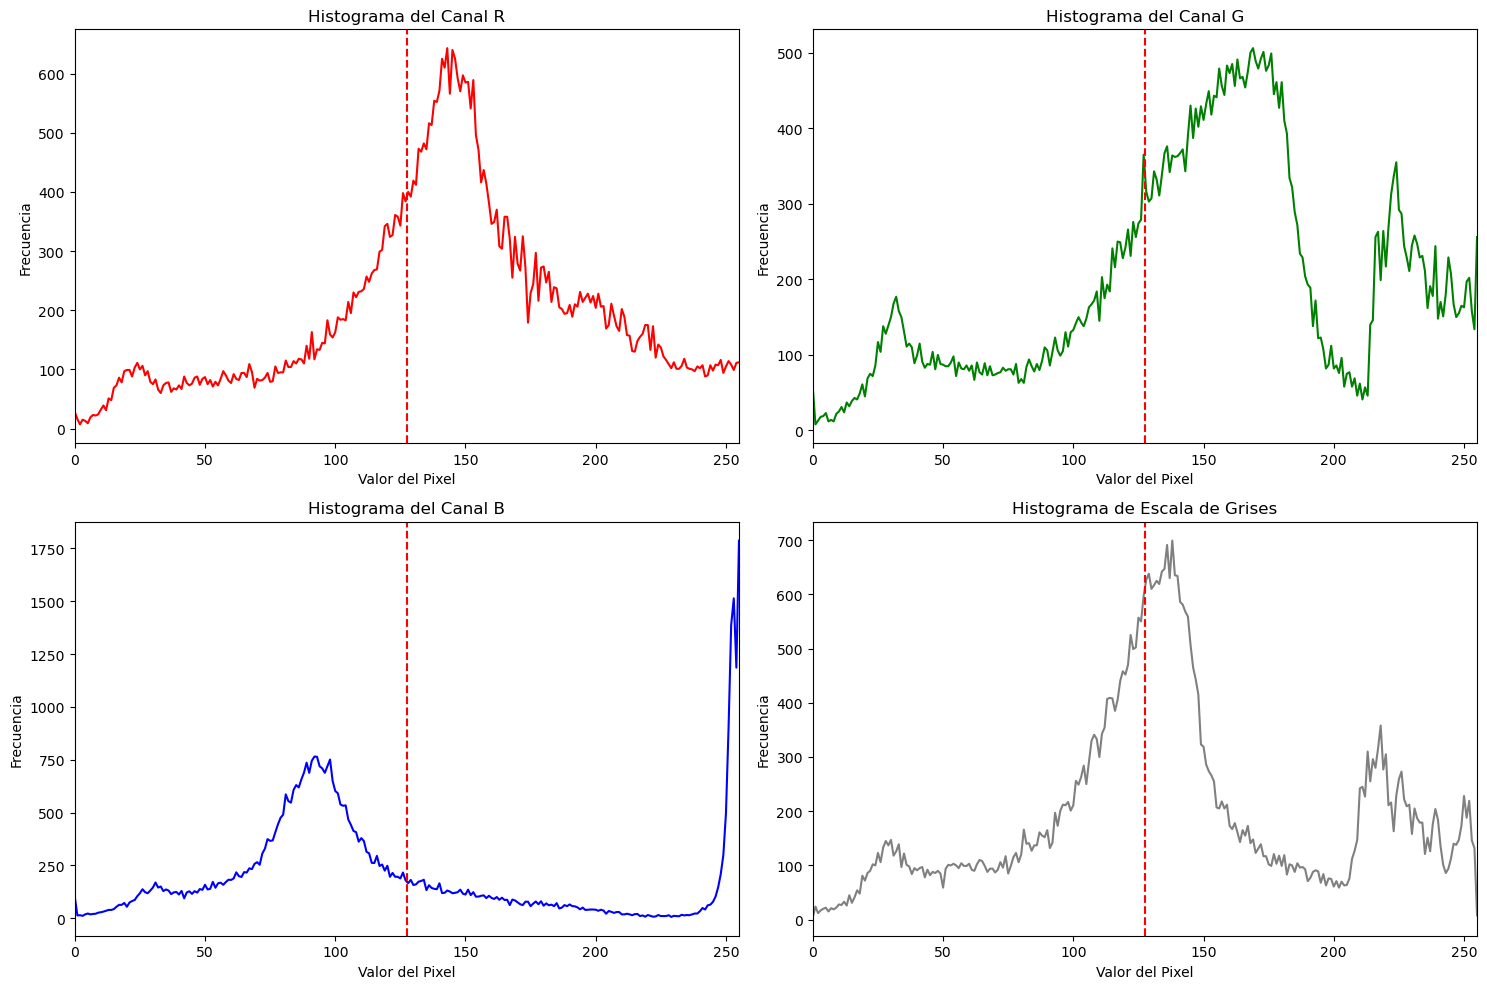

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(image):
    # Convertir la imagen a escala de grises usando promedio aritmético
    gray = np.mean(image, axis=2).astype(np.uint8)

    # Calcular los histogramas para cada canal
    color_channels = ('R', 'G', 'B')
    color_histograms = [cv2.calcHist([image[:, :, i]], [0], None, [256], [0, 256]) for i in range(3)]
    gray_histogram = cv2.calcHist([gray], [0], None, [256], [0, 256])

    # Calcular la media de los histogramas
    means = [np.mean(np.where(histogram > 0, np.arange(256), 0)) for histogram in color_histograms]
    gray_mean = np.mean(np.where(gray_histogram > 0, np.arange(256), 0))

    # Mostrar los histogramas
    plt.figure(figsize=(15, 10))

    for i, (channel, histogram, mean) in enumerate(zip(color_channels, color_histograms, means)):
        plt.subplot(2, 2, i + 1)
        plt.plot(histogram, color=channel.lower())
        plt.axvline(x=mean, color='r', linestyle='--')
        plt.title(f'Histograma del Canal {channel}')
        plt.xlabel('Valor del Pixel')
        plt.ylabel('Frecuencia')
        plt.xlim(0, 255)
    
    # Mostrar el histograma en escala de grises
    plt.subplot(2, 2, 4)
    plt.plot(gray_histogram, color='gray')
    plt.axvline(x=gray_mean, color='r', linestyle='--')
    plt.title('Histograma de Escala de Grises')
    plt.xlabel('Valor del Pixel')
    plt.ylabel('Frecuencia')
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()

# Cargar la imagen
img_4 = cv2.imread('granja.jpg')
img_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB)  # Convertir a RGB

# Mostrar los histogramas
plot_histogram(img_4)
